# Multiple Linear Regression Assignment
<b>Aadith Sukumar</b></br>


### Importing the libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl

### Loading Dataset

**Data Set Information:**
Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.
Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

**Attribute Information:**
Day.csv has the following fields:

- `instant`: record index
- `dteday` : date
- `season` : season (1:springer, 2:summer, 3:fall, 4:winter)
- `yr` : year (0: 2011, 1:2012)
- `mnth` : month ( 1 to 12)
- `hr` : hour (0 to 23)
- `holiday` : weather day is holiday or not (extracted from [Web Link])
- `weekday` : day of the week
- `workingday` : if day is neither weekend nor holiday is 1, otherwise is 0.
- `weathersit` :
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- `temp` : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- `atemp`: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- `hum`: Normalized humidity. The values are divided to 100 (max)
- `windspeed`: Normalized wind speed. The values are divided to 67 (max)
- `casual`: count of casual users
- `registered`: count of registered users
- `cnt`: count of total rental bikes including both casual and registered
for further more information please go through the following link,
<a href=https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset>archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset</a>



In [27]:
# Importing the dataset from data folder
df = pd.read_csv('data/day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Info about the dataset

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [29]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [30]:
df.shape

(730, 16)

### Finding NULL Values

In [31]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Hence, we can see that there are no NULL values in the dataset.

### Removing unwanted columns

In [32]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [33]:
df = df[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']]

In [34]:
df.shape

(730, 12)

### Splitting the dataset into the Training set and Test set

In [35]:
#Splitting data
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 333)

In [36]:
print(df_train.info())
print(df_train.shape)
print()
print(df_test.info())
print(df_test.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584 entries, 155 to 419
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      584 non-null    int64  
 1   yr          584 non-null    int64  
 2   mnth        584 non-null    int64  
 3   holiday     584 non-null    int64  
 4   weekday     584 non-null    int64  
 5   workingday  584 non-null    int64  
 6   weathersit  584 non-null    int64  
 7   temp        584 non-null    float64
 8   atemp       584 non-null    float64
 9   hum         584 non-null    float64
 10  windspeed   584 non-null    float64
 11  cnt         584 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 59.3 KB
None
(584, 12)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 22 to 491
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      146 non-null    int64  
 1   yr          146 no

### EDA

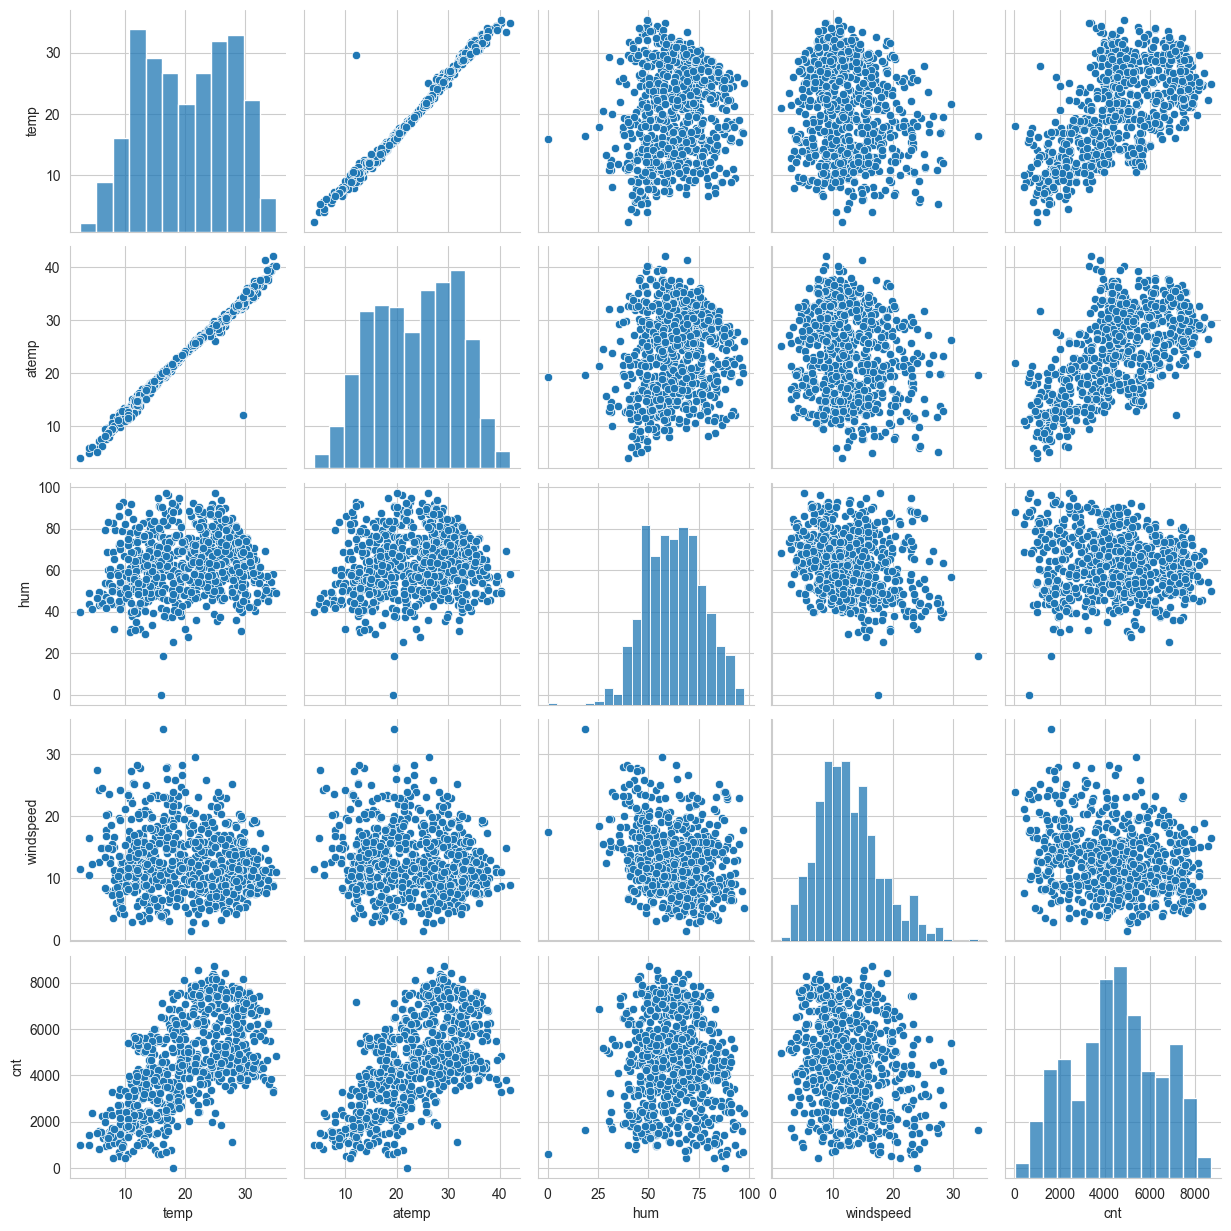

In [37]:
sns.pairplot(df[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']])

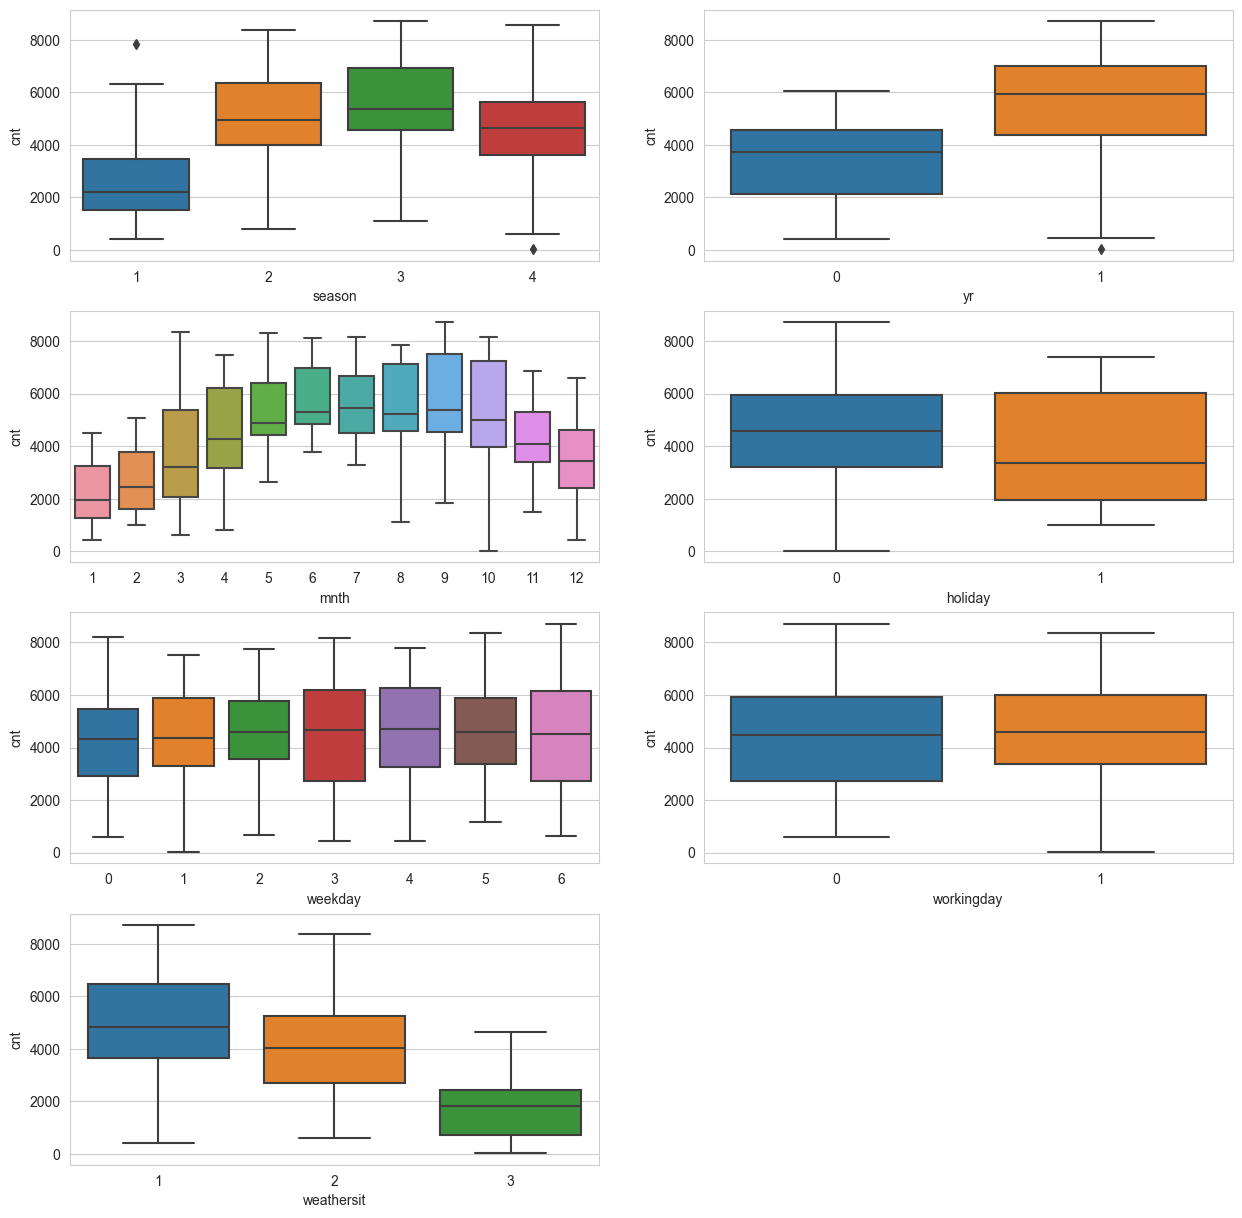

In [38]:
df_2 = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
i=1
for col in df_2:
    plt.subplot(4,2,i)
    sns.boxplot(data=df, x=col, y='cnt')
    i=i+1
plt.show()

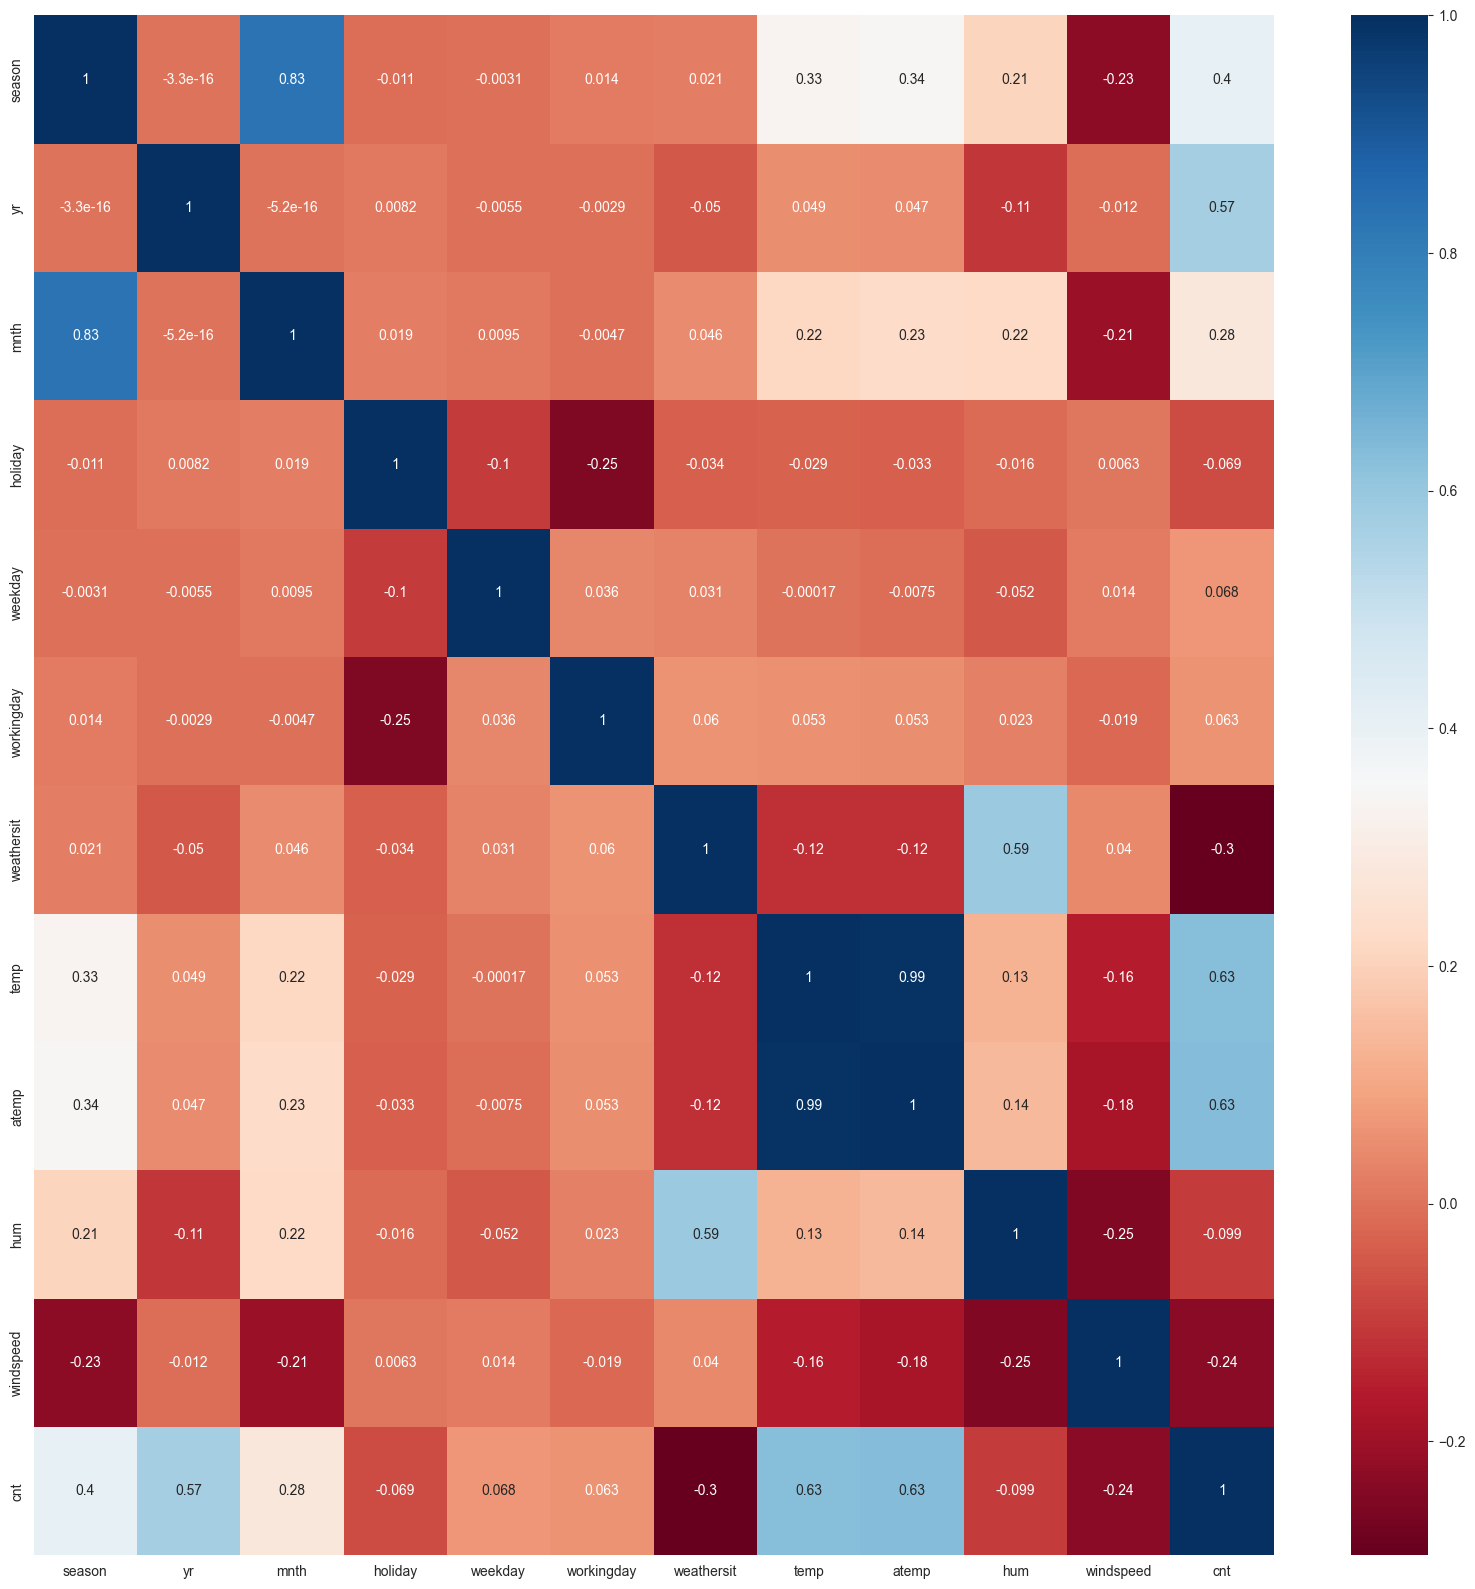

In [39]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True, cmap="RdBu")
plt.show()


In [40]:
# Appying Linear Regression Model and RFE
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

X_train = df_train.drop('cnt', axis=1)
y_train = df_train['cnt']

X_test = df_test.drop('cnt', axis=1)
y_test = df_test['cnt']

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)
rfe = rfe.fit(X_train, y_train)

In [41]:
# save model to a pickle file so that we can use it later with our web app to make predictions with user input
pkl.dump(rfe, open('./models/multiple-linear-reg-days.pkl', 'wb'))

In [44]:
# test model with user input

# take input from user
season = int(input('Enter season (1:springer, 2:summer, 3:fall, 4:winter): '))
yr = int(input('Enter year (0: 2011, 1:2012): '))
mnth = int(input('Enter month ( 1 to 12): '))
holiday = int(input('Enter holiday (0: no, 1:yes): '))
weekday = int(input('Enter weekday (0 to 6): '))
workingday = int(input('Enter workingday (0: no, 1:yes): '))
weathersit = int(input('Enter weathersit (1: Clear, Few clouds, Partly cloudy, Partly cloudy, 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist, 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds, 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog): '))
temp = float(input('Enter temperature in Celsius: '))
atemp = float(input('Enter feeling temperature in Celsius: '))
hum = float(input('Enter humidity: '))
windspeed = float(input('Enter wind speed: '))

# create a dataframe with the user input
user_input = pd.DataFrame({'season': [season],
                           'yr': [yr],
                           'mnth': [mnth],
                           'holiday': [holiday],
                           'weekday': [weekday],
                           'workingday': [workingday],
                           'weathersit': [weathersit],
                           'temp': [temp],
                           'atemp': [atemp],
                           'hum': [hum],
                           'windspeed': [windspeed]})

# make prediction with the user input
prediction = rfe.predict(user_input)
print('Predicted bike rental count for the given input is: ', prediction[0])


Predicted bike rental count for the given input is:  4484.407945244981


In [42]:
# Printing the boolean results
print(rfe.support_)
# Printing the ranking
print(rfe.ranking_)
# Printing the features
print(X_train.columns)


[ True  True False  True False False  True False  True False False]
[1 1 4 1 3 2 1 5 1 7 6]
Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')
